<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/cifar10Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [ ]:
which = 3
out_file = 'cifar10'
print( 'input data: ', out_file )
class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ] 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
channels = 3  #gray=1; rgb=3

input data:  cifar10


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [ ]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(60000, 32, 32, 3)
(60000, 1)
# of training images and their size: (48000, 32, 32, 3)
# of training labels and their size: (48000, 1) 

# of testing images and their size: (12000, 32, 32, 3)
# of testing labels and their size: (12000, 1)


In [ ]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 32
cols = 32
channels = 3 

min = 0
max = 255


In [ ]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  48000
shape before:  (48000, 32, 32, 3)
shape after:  (48000, 32, 32, 3)
# of testing images:  12000
shape before:  (12000, 32, 32, 3)


In [ ]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

**Create Convolutional Model**

---
This dataset, possibly due to being a color data set, requires that the convolution kernels be multidimensional (3,3).


In [ ]:
model = keras.models.Sequential([
                                      keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
                                      keras.layers.MaxPooling2D((2, 2)),
                                      keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
                                      keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D((2, 2)),
                                      keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
                                      keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D((2, 2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(64, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense( len(class_names), activation='softmax' )
])
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

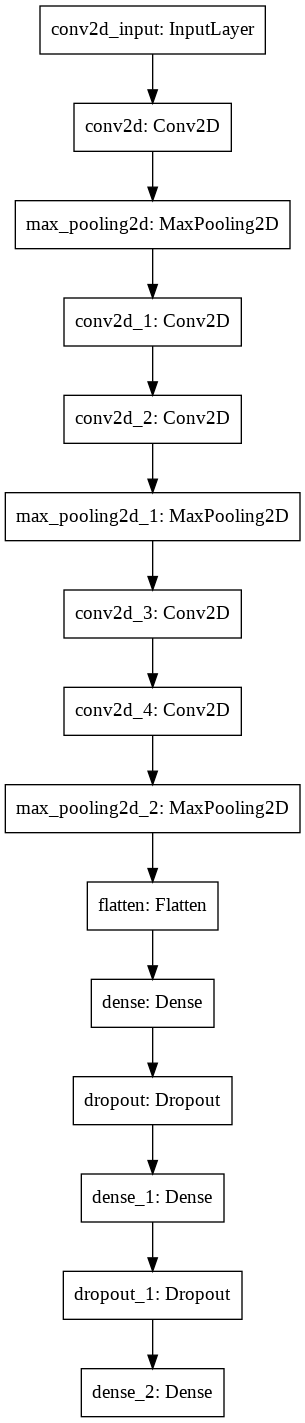

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [ ]:
# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )

**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [ ]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1500/1500 [==============================] - 24s 8ms/step - loss: 2.2291 - accuracy: 0.1362 - val_loss: 1.6880 - val_accuracy: 0.3552
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.7147 - accuracy: 0.3535 - val_loss: 1.4731 - val_accuracy: 0.4542
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.4926 - accuracy: 0.4535 - val_loss: 1.2463 - val_accuracy: 0.5364
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.3584 - accuracy: 0.5117 - val_loss: 1.2233 - val_accuracy: 0.5608
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.2657 - accuracy: 0.5513 - val_loss: 1.1159 - val_accuracy: 0.6052
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1699 - accuracy: 0.5892 - val_loss: 1.0327 - val_accuracy: 0.6401
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 1.0910 - accuracy: 0.6189 - val

In [ ]:
model.save('cifar_conv.h5')

In [ ]:
print(elapsed_training_time)

1045.0076923370361


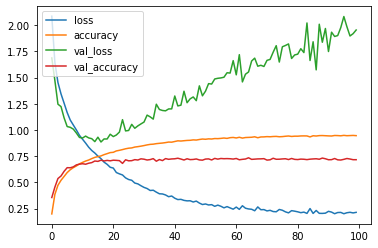

In [ ]:
pd.DataFrame(model.history.history).plot()

**Create Noisy Test Data**

---
Like the other cifar10 notebook, creating 20 additional test sets uses all of CoLab's RAM.


In [ ]:
np.random.seed(17)

zeroes = np.zeros(x_test.shape)
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 10):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)

In [ ]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)

In [ ]:
acc_df = pd.DataFrame(noise_accuracy_scores)
acc_df.to_csv('cifar_conv_accuracy.csv')

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

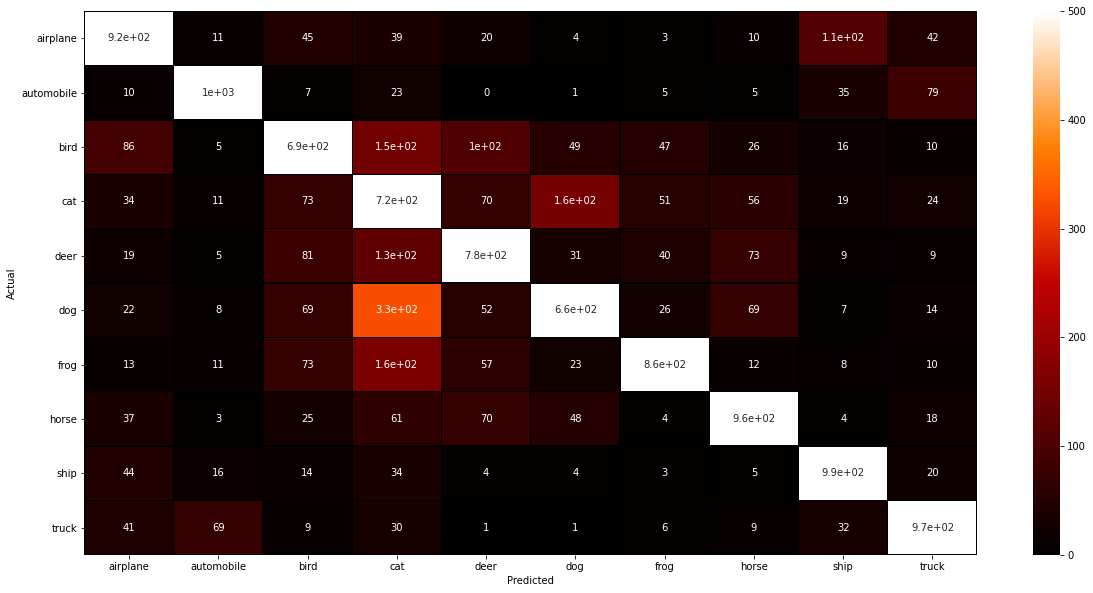

In [ ]:
noiseless_prediction = noisy_predictions[0]
cm = confusion_matrix(y_test, noiseless_prediction)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=500, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
bad = [noiseless_prediction[i] for i in range(len(noiseless_prediction)) if noiseless_prediction[i] != y_test[i]]
good = [noiseless_prediction[i] for i in range(len(noiseless_prediction)) if noiseless_prediction[i] == y_test[i]]

**This classifier hates cats**

[306 139 396 952 378 317 185 265 241 226]


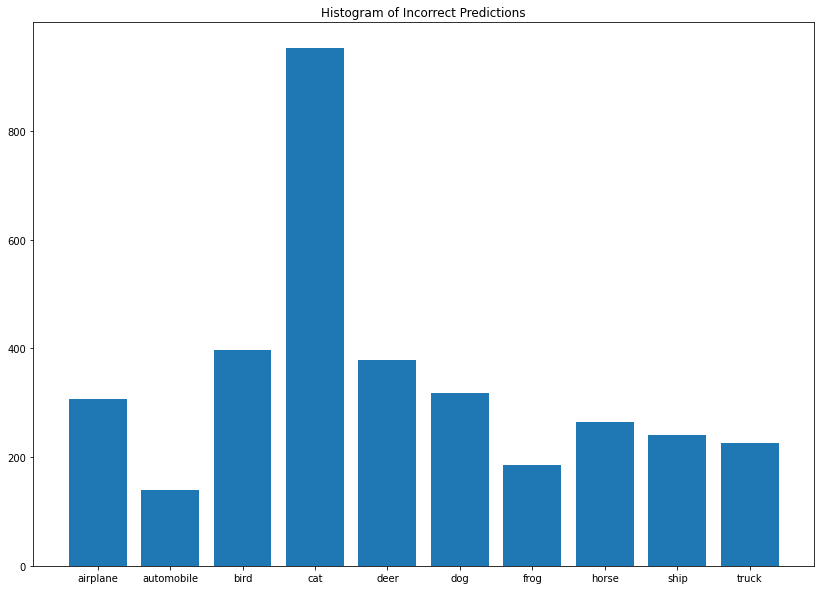

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[ 922 1049  694  716  775  657  856  960  994  972]


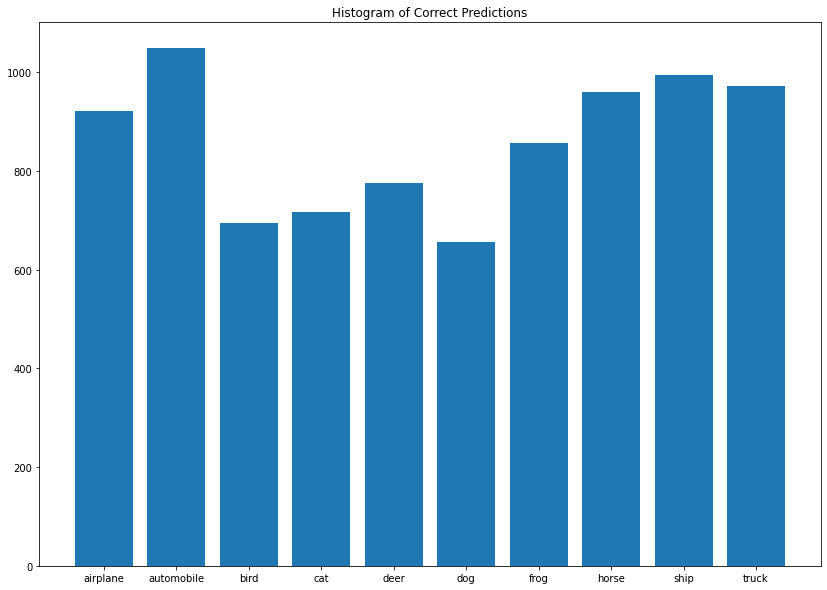

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[24.9185667752443, 11.7003367003367, 36.330275229357795, 57.07434052757794, 32.78404163052905, 32.54620123203286, 17.77137367915466, 21.632653061224488, 19.51417004048583, 18.864774624373958]


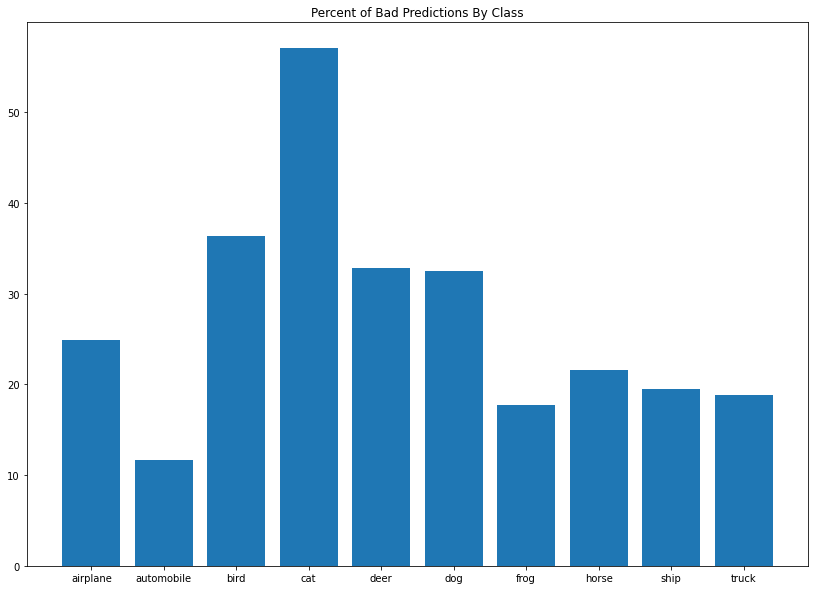

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

**Classification accuracy drops off very quickly as noise is applied to the test set**

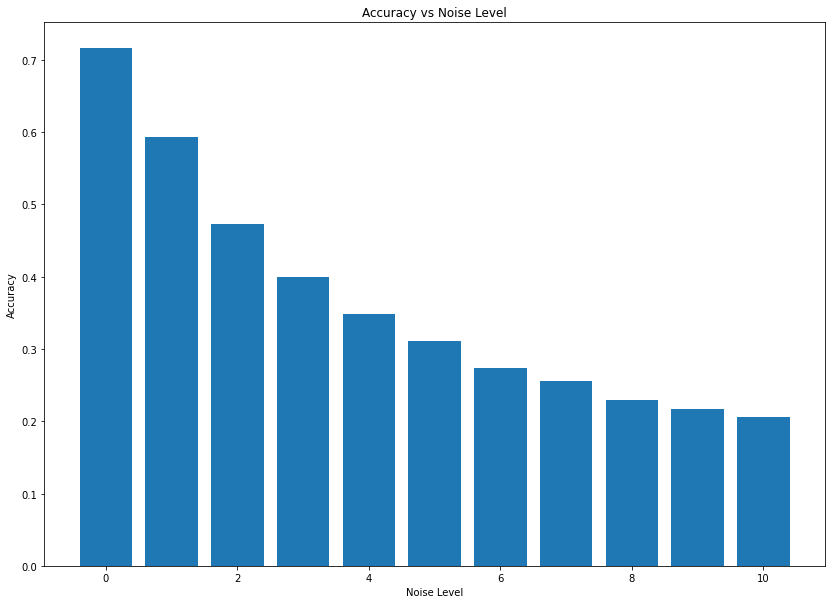

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 11), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()